In [1]:
import sys
from joblib import load
import torch

sys.path.insert(0, '..')
sys.path.insert(0, '../..')
sys.path.insert(0, '../../..')
sys.path.insert(0, '../../../..')
sys.path.insert(0, '../../../../..')

from reimplemented_approaches.proactive_conformance_checking.data_prep_split_encode import PrefixDataset
from reimplemented_approaches.proactive_conformance_checking.models import LSTMCollectiveIDP
from reimplemented_approaches.proactive_conformance_checking.evaluation import PredictionResults, Metrics

In [2]:
data_dir = "../data_preparation/Helpdesk/"
path_model = "../training/Helpdesk/LSTM_collecctive_IDP.pkl"

In [3]:
_, test_set = PrefixDataset.load_datasets(save_path=data_dir)

encoders = load(data_dir+"/encoders.pkl")
deviations = encoders.get("deviations")
print(deviations)

["y_('>>', 'Assign seriousness')", "y_('Create SW anomaly', '>>')", "y_('Require upgrade', '>>')", "y_('Resolve ticket', '>>')", "y_('Take in charge ticket', '>>')", "y_('Wait', '>>')"]


In [4]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device('cpu')
print(f"Evaluating on {device}")

Evaluating on cpu


In [5]:
model = LSTMCollectiveIDP.load(path_model, device=device)

In [ ]:
pr = PredictionResults(model=model, test_set=test_set)
probs, preds, targets = pr.get_predictions_targets()
# print(preds)
# print(targets)
# print(probs)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
[[6.48699643e-06 4.11698507e-04 9.75043513e-03 7.94283301e-02
  5.94358742e-02 8.45842212e-02]
 [6.49892263e-06 4.12310852e-04 9.75904893e-03 7.93559253e-02
  5.93872108e-02 8.45536515e-02]
 [6.52916970e-06 4.13147878e-04 9.77684278e-03 7.90858343e-02
  5.92723824e-02 8.44868571e-02]
 ...
 [4.49408544e-03 4.50376607e-03 1.29288975e-02 3.44743952e-02
  4.10888121e-02 7.10193515e-02]
 [2.74494756e-03 3.46790301e-03 1.14860656e-02 3.47776078e-02
  3.98365408e-02 6.64196983e-02]
 [4.50274860e-03 4.50823642e-03 1.29353143e-02 3.44831459e-02
  4.11031134e-02 7.10494965e-02]]


In [ ]:
m = Metrics(preds=preds, targets=targets)

{'precision_per_label': array([0., 0., 0., 0., 0., 0.]), 'recall_per_label': array([0., 0., 0., 0., 0., 0.]), 'macro_precision': 0.0, 'macro_recall': 0.0}
{'precision_per_label_non_deviation': array([0.99845419, 0.99732996, 0.9905846 , 0.96458685, 0.96205734,
       0.94013491]), 'recall_per_label_non_deviation': array([1., 1., 1., 1., 1., 1.]), 'macro_precision_non_deviation': 0.9755246393104741, 'macro_recall_non_deviation': 1.0}


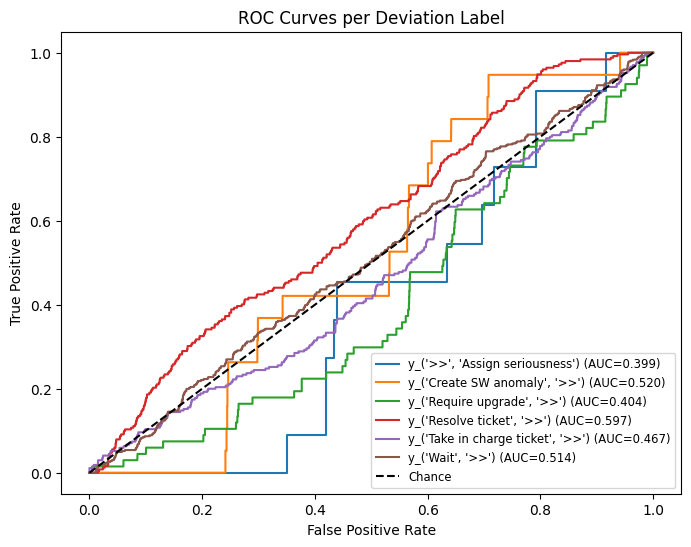

{'per_label_auc': array([0.39901478, 0.51983047, 0.40436666, 0.59692535, 0.46742569,
       0.51448978]), 'macro_auc': 0.48367545601889145}


In [ ]:
res_dev = m.macro_precision_recall_dev()
print(res_dev)

In [ ]:
res_no_dev = m.macro_precision_recall_no_dev()
print(res_no_dev)

In [ ]:
roc_auc = m.plot_macro_roc_auc(prob_scores=probs, label_names=deviations)
print(roc_auc)